In [1]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
from skimage import io

In [2]:
img = io.imread('Images/test3.jpg')

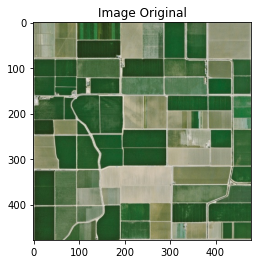

In [3]:
plt.title("Image Original")
plt.imshow(img)
plt.show()

In [4]:
# Gaussian Filtering

blur = cv2.bilateralFilter(img,9,75,75)

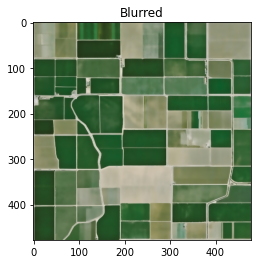

In [5]:
plt.title('Blurred')
plt.imshow(blur)
plt.show()

In [6]:
# SVM

from sklearn.svm import SVC

In [7]:
classes = {'végétation A': 0, 'végétation B': 1 ,'végétation C': 2 }

In [8]:
rows, cols, bands = img.shape
n_classes = len(classes)
## rouge - vert - bleu
palette = np.uint8([[255, 0, 0], [0, 255, 0], [0, 0, 255]])

In [9]:
X = blur.reshape(rows*cols, bands)

In [10]:
svm_seg = n_classes*np.ones(shape=(rows, cols), dtype=np.int)

In [11]:
svm_seg[0:20, 450:470] = classes['végétation A']
svm_seg[280:300, 250:270] = classes['végétation B']
svm_seg[350:370, 250:270] = classes['végétation C']

In [12]:
y = svm_seg.ravel()
train = np.flatnonzero(svm_seg < n_classes)
test = np.flatnonzero(svm_seg == n_classes)

In [13]:
classifier = SVC(gamma='scale' , C=0.00000001)
classifier.fit(X[train], y[train])
y[test] = classifier.predict(X[test])
svm_seg = y.reshape(rows, cols)

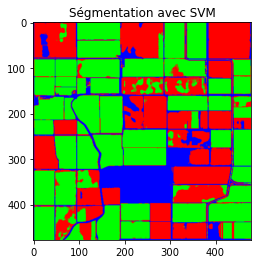

In [14]:
plt.title("Ségmentation avec SVM")
plt.imshow(palette[svm_seg])
plt.show()

In [15]:
# Canny

canny = cv2.Canny(blur, 100, 200)

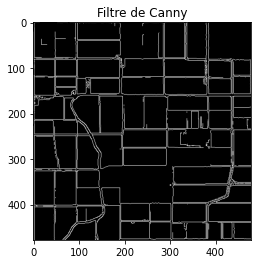

In [16]:
plt.title('Filtre de Canny')
plt.imshow(canny,cmap='gray')
plt.show()

In [17]:
# Dilatation

kernel = np.ones((5,5),np.uint8)
dilatation = cv2.dilate(canny,kernel,iterations = 1)

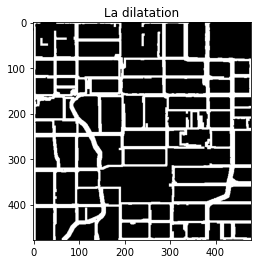

In [18]:
plt.title('La dilatation')
plt.imshow(dilatation,cmap='gray')
plt.show()

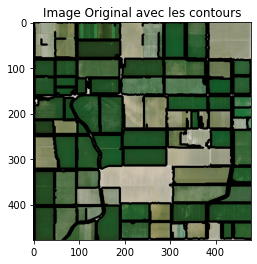

In [19]:
# Tracage des contours

contours, hierarchy = cv2.findContours(canny,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img, contours, -1, [0,0,0], 3)
plt.title("Image Original avec les contours")
plt.imshow(img)
plt.show()

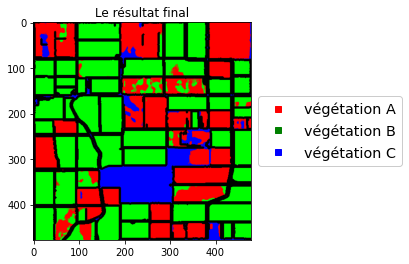

In [22]:
# Tracage des contours

image = palette[svm_seg]
contours, hierarchy = cv2.findContours(canny,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image, contours, -1, [0,0,0], 3)

# L'ajout du légende pour identifier les types de culture

colors = ["red", "green", "blue"]
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors[i]) for i in range(3)]
labels = classes.keys()
legend = plt.legend(handles, labels, loc='center left', fontsize='x-large', framealpha=1, bbox_to_anchor=(1, 0, 0.5, 1))
fig  = legend.figure
fig.canvas.draw()
bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())

plt.title("Le résultat final")
plt.imshow(image)
plt.show()